## Project Stage - III (Basic Machine Learning)

## Goals

The goal of Stage II is to utlize machine learning and statistical models to predict the trend of COVID-19 cases / deaths.

### Tasks:

#### Task 1: (70 pts)
- Team: (30)
    - Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US. 
        - Aim to predict 1 week in advance. Use older data to validate your models. 
        - Describe the trends as compared to other countries. 
- Member: (40 pts)
    - Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state and its counties. 
    - Identify which counties are most at risk.
    - Utilize the hospital data to calculate the point of no return for a state. 
    - Utilize decision tree, random forest, and ARIMA (https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) based models to compare and contrast the performance of each. 
    - Use 5 different variables from the enrichment data to predict the spread rate (cases and deaths) of COVID-19 in a county.
        - For example, percentage of population in certain age-group, socio-economic status, public transportation, work from home, etc.
        - Show the relative importance of variables and explain why. 
    
#### Task 2: (30 pts)
- Member:
    - For each of the aforemention analysis plot graphs,
        - trend line
        - confidence intervals
        - prediction path

**Deliverable**
- Report upload on canvas.
- Each member creates separate notebooks for member tasks. Upload all notebooks to Github Repository. 

## Deadline: 11/15/2020

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

#### Import CSV Files

In [3]:
cases = pd.read_csv("covid_confirmed_usafacts.csv")
deaths = pd.read_csv("covid_deaths_usafacts.csv")
population = pd.read_csv("covid_county_population_usafacts.csv")
hospital = pd.read_csv("Definitive_Healthcare%3A_USA_Hospital_Beds.csv")

# Enrichment Dataset
enrichment = pd.read_csv("ACSST1Y2019.S0101_data_with_overlays_2020-11-15T011814.csv",na_values=["(X)"],skiprows=[1],index_col= (['GEO_ID','NAME']))
sex_age_info = pd.read_csv("ACSST1Y2018.S0101_metadata_2020-09-12T231309.csv",index_col=0,header=None)

#### Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state and its counties.

In [10]:
# dataframe - New York Population
population_ny = population[population.State=='NY']
population_ny = population_ny.set_index(['countyFIPS', 'County Name']).drop([0], axis = 0)

In [104]:
# dataframe - last week cases for New York
cases_lastweek = cases.iloc[:,[0,1,2,-7,-6,-5,-4,-3,-2,-1]]
cases_lastweek = cases_lastweek[cases.State=='NY']
cases_lastweek = cases_lastweek.set_index(['County Name'])

In [105]:
# merged the dataframe
data = pd.merge(cases_lastweek, population_ny, on = 'County Name')
data = data.drop('State_y', axis = 1)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'population_x' is not defined
    Q("11/12/20_y") ~ population_x + Q("11/12/20_x")
                      ^^^^^^^^^^^^

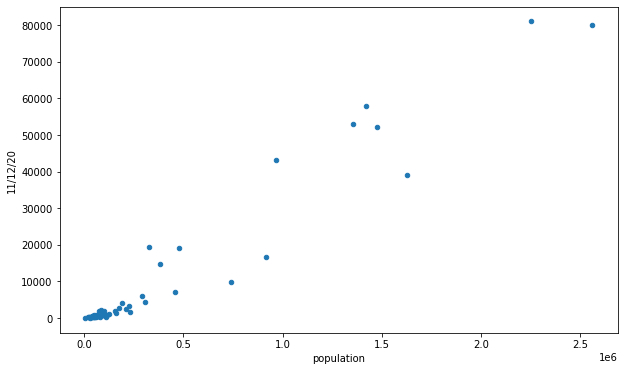

In [106]:
#Getting the most recent date and plotting data points between population and number of cases
data.plot(kind='scatter', x='population', y='11/12/20', figsize=(10, 6))

# new dataframe for least and greatest values of population in New York
x_pop = pd.DataFrame({'population' : [data.population.min(), data.population.max()]})

# prediction for x values
pred = lm.predict(x_pop)
# plotting least squares line on top of scatter plot of obsreved data
plt.plot(x_pop, pred, c='red', linewidth=2)

There seems to be a pattern between population of a county and number of cases.

In [107]:
# dataframe - last week deaths for New York
deaths_lastweek = deaths.iloc[:,[0,1,2,-7,-6,-5,-4,-3,-2,-1]]
deaths_lastweek = deaths_lastweek[deaths.State=='NY']
deaths_lastweek = deaths_lastweek.set_index(['countyFIPS', 'County Name']).drop([0,1], axis = 0)

In [108]:
# merged the dataframe
data_death = pd.merge(deaths_lastweek, population_ny, on = 'County Name')
data_death = data_death.drop('State_y', axis = 1)

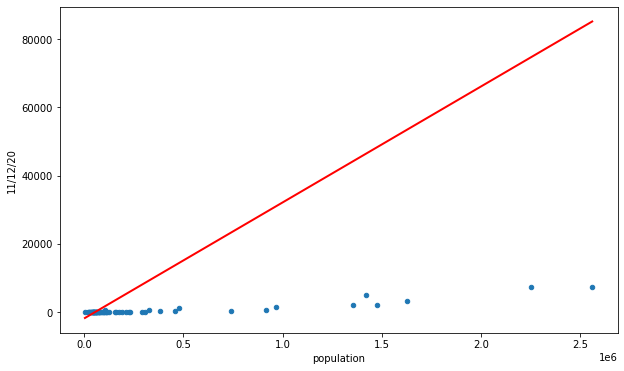

In [116]:
#Getting the most recent date and plotting data points between population and number of cases
data_death.plot(kind='scatter', x='population', y='11/12/20', figsize=(10, 6))

# new dataframe for least and greatest values of population in New York
x_pop_deaths = pd.DataFrame({'population' : [data_death.population.min(), data_death.population.max()]})

# prediction for x values
pred_deaths = lm.predict(x_pop_deaths)

# plotting least squares line on top of scatter plot of obsreved data
plt.plot(x_pop_deaths, pred_deaths, c='red', linewidth=2)

The least squares line does not seem to fit well for the death scatter plot.

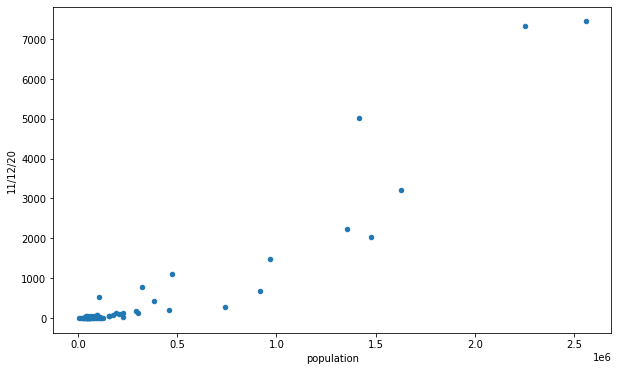

In [117]:
#Getting the most recent date and plotting data points between population and number of cases
data_death.plot(kind='scatter', x='population', y='11/12/20', figsize=(10, 6))

poly = smf.ols(formula='Q("11/12/20") ~ 1 + population', data = data_death).fit()

plt.plot(x_pop_deaths.population, poly.predict(x_pop_deaths), 'b-', alpha=0.9)

In [118]:
lm.rsquared

0.9418083728011962

In [120]:
sdata = pd.merge(data, data_death, on = 'County Name')
lm = smf.ols(formula='Q("11/12/20_y") ~ population_x + Q("11/12/20_x")', data=sdata).fit()

lm.params

Intercept         -177.546743
population_x         0.000939
Q("11/12/20_x")      0.049295
dtype: float64

In [121]:
lm.rsquared

0.8969481034292476

#### Identify which counties are most at risk.

In [122]:
# fitted linear model
lm = smf.ols(formula= 'Q("11/12/20") ~ population', data=data).fit()
# print coefficients
lm.params

Intercept    -1861.736081
population       0.033988
dtype: float64

Counties with a higher population, are expected to have higher number of cases.

In [123]:
# create new dataframe
x_pop = pd.DataFrame({'population' : [2000000]})
# predict population of 2,000,000
lm.predict(x_pop)

0    66114.470129
dtype: float64

With a population of 2,000,000 people, New York is predicted to have approximately 66,114 cases on 11/12/2020.

#### Utilize the hospital data to calculate the point of no return for a state

In [124]:
# dataframe - New York hospitals
hospital_ny = hospital[hospital.HQ_STATE=='NY']
hospital_ny = hospital_ny.fillna(0)

# the total number of staffed beds in New York
hospital_ny['NUM_STAFFED_BEDS'].sum(axis = 0)

46848.0

#### Utilize decision tree, random forest, and ARIMA based models to compare and contrast the performance of each.

#### Use 5 different variables from the enrichment data to predict the spread rate (cases and deaths) of COVID-19 in a county

In [125]:
# display variable names and descriptions
sex_age_info.loc[["NAME",
               "S0101_C02_003E",
               "S0101_C02_004E",
               "S0101_C02_005E",
               "S0101_C02_006E",
               "S0101_C02_007E",
               "S0101_C02_008E",
               "S0101_C02_009E",
               "S0101_C02_010E",
               "S0101_C02_011E",
               "S0101_C02_012E",
               "S0101_C02_013E", 
               "S0101_C02_028E"
             ]]

,1
0,
NAME,Geographic Area Name
S0101_C02_003E,Estimate!!Percent!!Total population!!AGE!!5 to...
S0101_C02_004E,Estimate!!Percent!!Total population!!AGE!!10 t...
S0101_C02_005E,Estimate!!Percent!!Total population!!AGE!!15 t...
S0101_C02_006E,Estimate!!Percent!!Total population!!AGE!!20 t...
S0101_C02_007E,Estimate!!Percent!!Total population!!AGE!!25 t...
S0101_C02_008E,Estimate!!Percent!!Total population!!AGE!!30 t...
S0101_C02_009E,Estimate!!Percent!!Total population!!AGE!!35 t...
S0101_C02_010E,Estimate!!Percent!!Total population!!AGE!!40 t...


In [126]:
# select desired vairables
enrichdata = enrichment[[
                        "S0101_C02_003E",
                         "S0101_C02_004E",
                         "S0101_C02_005E",
                         "S0101_C02_006E",
                         "S0101_C02_007E",
                         "S0101_C02_008E",
                         "S0101_C02_009E",
                         "S0101_C02_010E",
                         "S0101_C02_011E",
                         "S0101_C02_012E",
                         "S0101_C02_013E",
                         "S0101_C02_028E"
                        ]]
enrichdata

,,S0101_C02_003E,S0101_C02_004E,S0101_C02_005E,S0101_C02_006E,S0101_C02_007E,S0101_C02_008E,S0101_C02_009E,S0101_C02_010E,S0101_C02_011E,S0101_C02_012E,S0101_C02_013E,S0101_C02_028E
GEO_ID,NAME,,,,,,,,,,,,
0500000US36001,"Albany County, New York",4.5,5.6,7.8,9.8,7.1,6.2,6.3,5.5,5.4,6.2,6.7,23.9
0500000US36005,"Bronx County, New York",6.3,7.3,6.6,7.0,8.4,7.6,6.4,6.4,6.0,6.3,6.0,18.8
0500000US36007,"Broome County, New York",5.1,5.2,7.7,9.9,6.2,5.2,5.1,5.4,4.9,6.0,7.0,26.7
0500000US36009,"Cattaraugus County, New York",6.1,6.0,6.7,6.0,5.5,5.7,5.2,5.6,5.8,6.4,7.4,27.9
0500000US36011,"Cayuga County, New York",4.7,6.3,5.3,5.6,6.0,5.7,6.8,5.6,6.2,7.1,8.3,27.5
0500000US36013,"Chautauqua County, New York",5.9,5.0,7.3,6.3,5.6,5.9,5.8,4.9,6.0,6.2,8.0,27.7
0500000US36015,"Chemung County, New York",5.8,5.8,6.1,5.8,6.3,6.6,5.2,5.8,5.6,7.6,7.6,26.8
0500000US36019,"Clinton County, New York",4.9,4.9,7.1,9.0,6.6,6.1,5.9,6.5,6.3,6.3,7.0,24.8
0500000US36027,"Dutchess County, New York",5.0,5.8,7.4,6.8,6.1,5.5,5.9,6.0,6.5,7.3,8.0,25.4


#### analysis plot graphs